In [301]:
import numpy as np
from scipy.integrate import odeint
import sdeint

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

A = np.array([[-0.5, -2.0],
              [ 2.0, -1.0]])

B = np.diag([0.5, 0.5]) # diagonal, so independent driving Wiener processes

tspan = np.linspace(0.0, 10.0, 100*2)
x0 = np.array([3.0, 3.0])

def f(x, t):
    return A.dot(x)

def G(x, t):
    return np.diag([0.01,0.01])*(0.5+x.dot(x))#B




In [302]:
B

array([[0.5, 0. ],
       [0. , 0.5]])

In [303]:
np.diag([0.,0.])#B

array([[0., 0.],
       [0., 0.]])

In [304]:
def confidence_ellipse(x, y, ax, n_std=3.0, color='red',facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        edgecolor=color,
        facecolor = facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    
    ax.plot(mean_x, mean_y,'.',c=color, **kwargs)
    
    return ax.add_patch(ellipse)

In [305]:
results = [sdeint.itoint(f, G, x0, tspan) for n in range(50*4)]

In [306]:
results;

In [307]:


result_no_noise = odeint(f, x0, tspan)

In [308]:
result_no_noise;

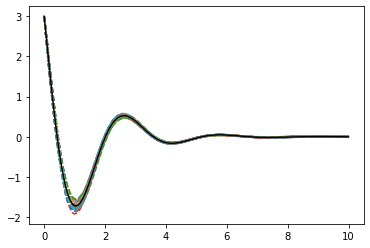

In [309]:

for res in results:
    plt.plot(tspan, res[:,0], '--')
plt.plot(tspan, result_no_noise[:,0], 'k')

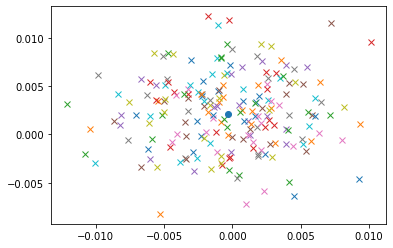

In [310]:
for res in results:
    plt.plot(res[-1,0],res[-1,1],'x')
plt.plot(result_no_noise[-1,0], result_no_noise[-1,1],'o')



In [311]:
result_no_noise[-1,0], result_no_noise[-1,1]

(-0.0003208100422917498, 0.0021316914985798257)

In [312]:
xvals = np.array([res[-1,0] for res in results])
yvals = np.array([res[-1,1] for res in results])

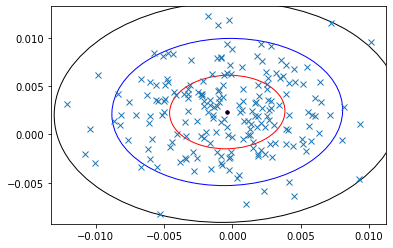

In [313]:
plt.plot(xvals, yvals,'x')
ax = plt.gca()
confidence_ellipse(xvals, yvals, ax, n_std = 1, color='r')
confidence_ellipse(xvals, yvals, ax, n_std = 2, color='b')
confidence_ellipse(xvals, yvals, ax, n_std = 3, color='k')

In [317]:
cov=np.cov(xvals, yvals)
cov

array([[1.78426442e-05, 4.55433128e-07],
       [4.55433128e-07, 1.45446395e-05]])

In [316]:
pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
pearson

0.02827115351898349

In [296]:
xvals.var(), yvals.var()

(5.5737117894000245e-09, 4.804791343740531e-09)

In [297]:
xvals.mean(), yvals.mean()

(-0.00035647030412788396, 0.0020499531830707146)

In [298]:
i=[0,1,2,3]
n=[50, 200, 800, 800*4]
m=[100, 200, 400, 800]
xvar=[0.19819652362460696, 0.18384679606339774, 0.17606674133844372, 0.1794225431784489]
yvar=[0.1900435858592489,0.16707604341740276, 0.1643085278517066, 0.15726882215719132]
xmean=[-0.004081806480811258,-0.01424711082278337,0.005887609144151832, -0.001061228828617681]
ymean=[-0.0635637582083507,-0.006337637699771519,0.004586462765076563, 0.0010109013048098616]

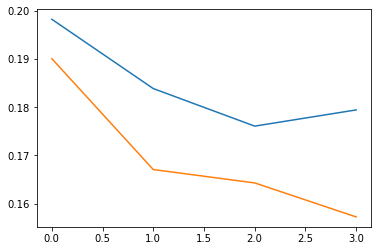

In [299]:
plt.plot(i, xvar)
plt.plot(i, yvar)

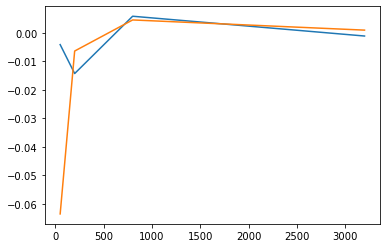

In [165]:
plt.plot(n, xmean)
plt.plot(n, ymean)

In [136]:
X, Y = np.mgrid[xvals.min():xvals.max():100j, yvals.min():yvals.max():100j]

In [137]:
positions = np.vstack([X.ravel(), Y.ravel()])

In [139]:
values = np.vstack([xvals, yvals])

In [142]:
from scipy import stats
kernel = stats.gaussian_kde(values)

In [143]:
kernel

In [144]:
Z = np.reshape(kernel.evaluate(positions).T, X.shape)

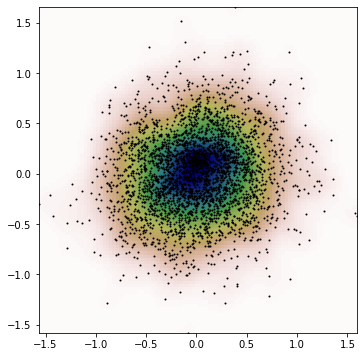

In [147]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xvals.min(), xvals.max(), yvals.min(), yvals.max()])
ax.plot(xvals, yvals, 'k.', markersize=2)

In [149]:
kernel.factor*kernel.covariance

array([[0.00317276, 0.0003066 ],
       [0.0003066 , 0.00278102]])